In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

# 1.) Data Preprocessing

In [255]:
dataset = pd.read_csv('../Datasets/RTA Dataset.csv')

In [256]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## 1.1) Numeric Features

In [257]:
dataset_cont = dataset[['Number_of_vehicles_involved' ,'Number_of_casualties', 'Accident_severity']]
cont_features = dataset_cont.columns

In [258]:
cont_features

Index(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Accident_severity'],
      dtype='object')

### 1.1.1) Number of Vehicles

In [259]:
dataset_cont['Number_of_vehicles_involved'].value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

In [260]:
dataset_cont['Number_of_vehicles_involved'].isnull().sum()

0

In [261]:
dataset_cont['Number_of_vehicles_involved'].describe()

count    12316.000000
mean         2.040679
std          0.688790
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: Number_of_vehicles_involved, dtype: float64

### 1.2.1) Number of casualties

In [262]:
dataset_cont['Number_of_casualties'].describe()

count    12316.000000
mean         1.548149
std          1.007179
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Number_of_casualties, dtype: float64

In [263]:
dataset_cont['Number_of_casualties'].isnull().sum()

0

## 1.2.) Missing Values

In [264]:
missingValues = pd.DataFrame(dataset.isnull().sum()).reset_index().rename(columns={'Index': 'Feature', 0:'Missing Count'}).sort_values(by=['Missing Count'], ascending=False)

In [265]:
missingValues

,index,Missing Count
10,Defect_of_vehicle,4427
9,Service_year_of_vehicle,3928
27,Work_of_casuality,3198
28,Fitness_of_casuality,2635
7,Type_of_vehicle,950
14,Types_of_Junction,887
6,Driving_experience,829
4,Educational_level,741
5,Vehicle_driver_relation,579
8,Owner_of_vehicle,482


##### We can see that following features have very large count of missing values so dropping those features.


In [266]:
dataset.drop(columns = ['Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality','Vehicle_driver_relation'], inplace=True)

In [267]:
missingValues = pd.DataFrame(dataset.isnull().sum()).reset_index().rename(columns={'Index': 'Feature', 0:'Missing Count'}).sort_values(by=['Missing Count'], ascending=False)

In [268]:
missingValues

,index,Missing Count
8,Service_year_of_vehicle,3928
6,Type_of_vehicle,950
12,Types_of_Junction,887
5,Driving_experience,829
4,Educational_level,741
7,Owner_of_vehicle,482
10,Lanes_or_Medians,385
20,Vehicle_movement,308
9,Area_accident_occured,239
13,Road_surface_type,172


In [269]:
non_null_Dataframe = missingValues.tail(16)

In [270]:
non_null_Dataframe

,index,Missing Count
23,Age_band_of_casualty,0
22,Sex_of_casualty,0
0,Time,0
24,Casualty_severity,0
25,Pedestrian_movement,0
26,Cause_of_accident,0
21,Casualty_class,0
14,Road_surface_conditions,0
19,Number_of_casualties,0
18,Number_of_vehicles_involved,0


In [271]:
non_null_features = list(non_null_Dataframe['index'])

In [272]:
non_null_features

['Age_band_of_casualty',
 'Sex_of_casualty',
 'Time',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Casualty_class',
 'Road_surface_conditions',
 'Number_of_casualties',
 'Number_of_vehicles_involved',
 'Weather_conditions',
 'Light_conditions',
 'Day_of_week',
 'Sex_of_driver',
 'Age_band_of_driver',
 'Accident_severity']

## 1.3) Creating Training Dataframe

In [273]:
trainingDataframe = dataset[non_null_features]

In [274]:
trainingDataframe.head()

,Age_band_of_casualty,Sex_of_casualty,Time,Casualty_severity,Pedestrian_movement,Cause_of_accident,Casualty_class,Road_surface_conditions,Number_of_casualties,Number_of_vehicles_involved,Weather_conditions,Light_conditions,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,na,na,17:02:00,na,Not a Pedestrian,Moving Backward,na,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Slight Injury
1,na,na,17:02:00,na,Not a Pedestrian,Overtaking,na,Dry,2,2,Normal,Daylight,Monday,Male,31-50,Slight Injury
2,31-50,Male,17:02:00,3,Not a Pedestrian,Changing lane to the left,Driver or rider,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Serious Injury
3,18-30,Female,1:06:00,3,Not a Pedestrian,Changing lane to the right,Pedestrian,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury
4,na,na,1:06:00,na,Not a Pedestrian,Overtaking,na,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury


In [275]:
def getHour(time):
  value = datetime.strptime(time, '%H:%M:%S')
  return value.hour

In [276]:
trainingDataframe['Time'] = trainingDataframe['Time'].apply(getHour)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [277]:
trainingDataframe.head()

,Age_band_of_casualty,Sex_of_casualty,Time,Casualty_severity,Pedestrian_movement,Cause_of_accident,Casualty_class,Road_surface_conditions,Number_of_casualties,Number_of_vehicles_involved,Weather_conditions,Light_conditions,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,na,na,17,na,Not a Pedestrian,Moving Backward,na,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Slight Injury
1,na,na,17,na,Not a Pedestrian,Overtaking,na,Dry,2,2,Normal,Daylight,Monday,Male,31-50,Slight Injury
2,31-50,Male,17,3,Not a Pedestrian,Changing lane to the left,Driver or rider,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Serious Injury
3,18-30,Female,1,3,Not a Pedestrian,Changing lane to the right,Pedestrian,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury
4,na,na,1,na,Not a Pedestrian,Overtaking,na,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury


In [278]:
def makeDummies(feature):
  globals() ['{}'.format(feature)] = pd.get_dummies(trainingDataframe[feature])

In [279]:
for feature in non_null_features:
  makeDummies(feature)

In [280]:
non_null_features

['Age_band_of_casualty',
 'Sex_of_casualty',
 'Time',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Casualty_class',
 'Road_surface_conditions',
 'Number_of_casualties',
 'Number_of_vehicles_involved',
 'Weather_conditions',
 'Light_conditions',
 'Day_of_week',
 'Sex_of_driver',
 'Age_band_of_driver',
 'Accident_severity']

In [281]:
LabeledDataFrame = pd.concat([Casualty_class,
 Pedestrian_movement,
 Cause_of_accident,
 Casualty_severity,
 Age_band_of_casualty,
 Sex_of_casualty,
 Time,
 Road_surface_conditions,
 Number_of_casualties,
 Number_of_vehicles_involved,
 Weather_conditions,
 Light_conditions,
 Day_of_week,
 Sex_of_driver,
 Age_band_of_driver,
 Accident_severity], axis=1)

In [282]:
LabeledDataFrame.head()

,Driver or rider,Passenger,Pedestrian,na,Crossing from driver's nearside,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Not a Pedestrian,...,Male,Unknown,18-30,31-50,Over 51,Under 18,Unknown,Fatal injury,Serious Injury,Slight Injury
0,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [283]:
LabeledDataFrame.shape

(12316, 119)

## 1.4) Defining useful methods for preprocessing

In [284]:
features_with_low_accuracy = list()

In [285]:
def getNullIndexes(feature):
  null_indexes = dataset[pd.isna(dataset[feature])].index
  return null_indexes

In [286]:
def get_X_Y(null_indexes, feature):
  
  X = LabeledDataFrame.drop(null_indexes)
  y = dataset.drop(null_indexes)[feature]
  return X,y

In [287]:
def prepareModel(X_train, X_test, y_train, y_test):
  gbc = GradientBoostingClassifier()
  gbc.fit(X_train,y_train)
  print('Accuracy on Training Data: ',accuracy_score(y_train, gbc.predict(X_train)))
  print('Accuracy on Training Data: ',accuracy_score(y_test, gbc.predict(X_test)))
  if accuracy_score(y_test, gbc.predict(X_test)) < .5 : features_with_low_accuracy.append(feature)
  return gbc

In [288]:
def get_missing_predictions(gbc, null_indexes, feature):
  predictions = gbc.predict(LabeledDataFrame.iloc[null_indexes])
  predicted = pd.DataFrame(predictions, columns=[feature], index=null_indexes)
  return predicted

In [289]:
def impute(fromDataset, feature, null_indexes):
  for i in null_indexes:
    dataset[feature][i] = fromDataset[feature][i]

In [290]:
def modeImputation(value,feat):
  mode = dataset[feat].mode()[0]
  if pd.isna(value):
    return mode
  else: return value

## 1.5) Imputing missing values

In [291]:
def ImputeScript(feature):
  if feature in ['Type_of_vehicle', 'Types_of_Junction', 'Driving_experience', 'Lanes_or_Medians', 'Area_accident_occured']:
    dataset[feature] = dataset[feature].apply(modeImputation, feat = feature)

  else:
    print('For feature: {}'.format(feature))
    dof_null_indexes = getNullIndexes(feature)
    X_dof, y_dof = get_X_Y(dof_null_indexes, feature)
    X_train, X_test, y_train, y_test = train_test_split(X_dof, y_dof, test_size=.3, random_state=101)
    gbc = prepareModel(X_train, X_test, y_train, y_test)
    predictedDataframe = get_missing_predictions(gbc, dof_null_indexes, feature)
    impute(predictedDataframe, feature, dof_null_indexes)
    print()
    print()

In [292]:
missingValues

,index,Missing Count
8,Service_year_of_vehicle,3928
6,Type_of_vehicle,950
12,Types_of_Junction,887
5,Driving_experience,829
4,Educational_level,741
7,Owner_of_vehicle,482
10,Lanes_or_Medians,385
20,Vehicle_movement,308
9,Area_accident_occured,239
13,Road_surface_type,172


In [293]:
feature_with_missing_values = list(missingValues.head(12)['index'])

In [294]:
feature_with_missing_values

['Service_year_of_vehicle',
 'Type_of_vehicle',
 'Types_of_Junction',
 'Driving_experience',
 'Educational_level',
 'Owner_of_vehicle',
 'Lanes_or_Medians',
 'Vehicle_movement',
 'Area_accident_occured',
 'Road_surface_type',
 'Type_of_collision',
 'Road_allignment']

In [295]:
dataset[feature_with_missing_values].isnull().sum()

Service_year_of_vehicle    3928
Type_of_vehicle             950
Types_of_Junction           887
Driving_experience          829
Educational_level           741
Owner_of_vehicle            482
Lanes_or_Medians            385
Vehicle_movement            308
Area_accident_occured       239
Road_surface_type           172
Type_of_collision           155
Road_allignment             142
dtype: int64

In [296]:
for feature in feature_with_missing_values:
  ImputeScript(feature)

For feature: Service_year_of_vehicle


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.41338783852835975
Accuracy on Training Data:  0.3321414382201033


C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]




For feature: Educational_level


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.6776104665514687
Accuracy on Training Data:  0.6395047509357904


For feature: Owner_of_vehicle


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.8847036098032114
Accuracy on Training Data:  0.887074063644044


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]




For feature: Vehicle_movement


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.702558001189768
Accuracy on Training Data:  0.6680543991118513


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]




For feature: Road_surface_type


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.9372941176470588
Accuracy on Training Data:  0.924807903402854


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se



For feature: Type_of_collision


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.7348449248120301
Accuracy on Training Data:  0.7201973143326938


For feature: Road_allignment


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\v

Accuracy on Training Data:  0.8709071705198921
Accuracy on Training Data:  0.8546400218998084


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]


In [297]:
features_with_low_accuracy

['Service_year_of_vehicle']

In [298]:
dataset[feature_with_missing_values].isnull().sum()

Service_year_of_vehicle    0
Type_of_vehicle            0
Types_of_Junction          0
Driving_experience         0
Educational_level          0
Owner_of_vehicle           0
Lanes_or_Medians           0
Vehicle_movement           0
Area_accident_occured      0
Road_surface_type          0
Type_of_collision          0
Road_allignment            0
dtype: int64

In [299]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Unknown,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Unknown,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,5-10yrs,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [300]:
dataset['Time'] = dataset['Time'].apply(getHour)

In [301]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Unknown,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Unknown,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,5-10yrs,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [302]:
dataset.shape

(12316, 28)

## 1.6) Finding Correlation between features

In [303]:
import scipy.stats as ss
from sklearn.feature_selection import chi2

In [304]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [305]:
correlationMatrix = list()

In [306]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Unknown,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Unknown,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,5-10yrs,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [307]:
for fromfeature in dataset.columns:
  correlationList = list()
  for toFeature in dataset.columns:
    correlation = cramers_v(dataset[fromfeature], dataset[toFeature])
    correlationList.append(correlation)
  correlationMatrix.append(correlationList) 

In [308]:
correlationDataFrame = pd.DataFrame(correlationMatrix, columns=dataset.columns, index=dataset.columns)

<AxesSubplot:>

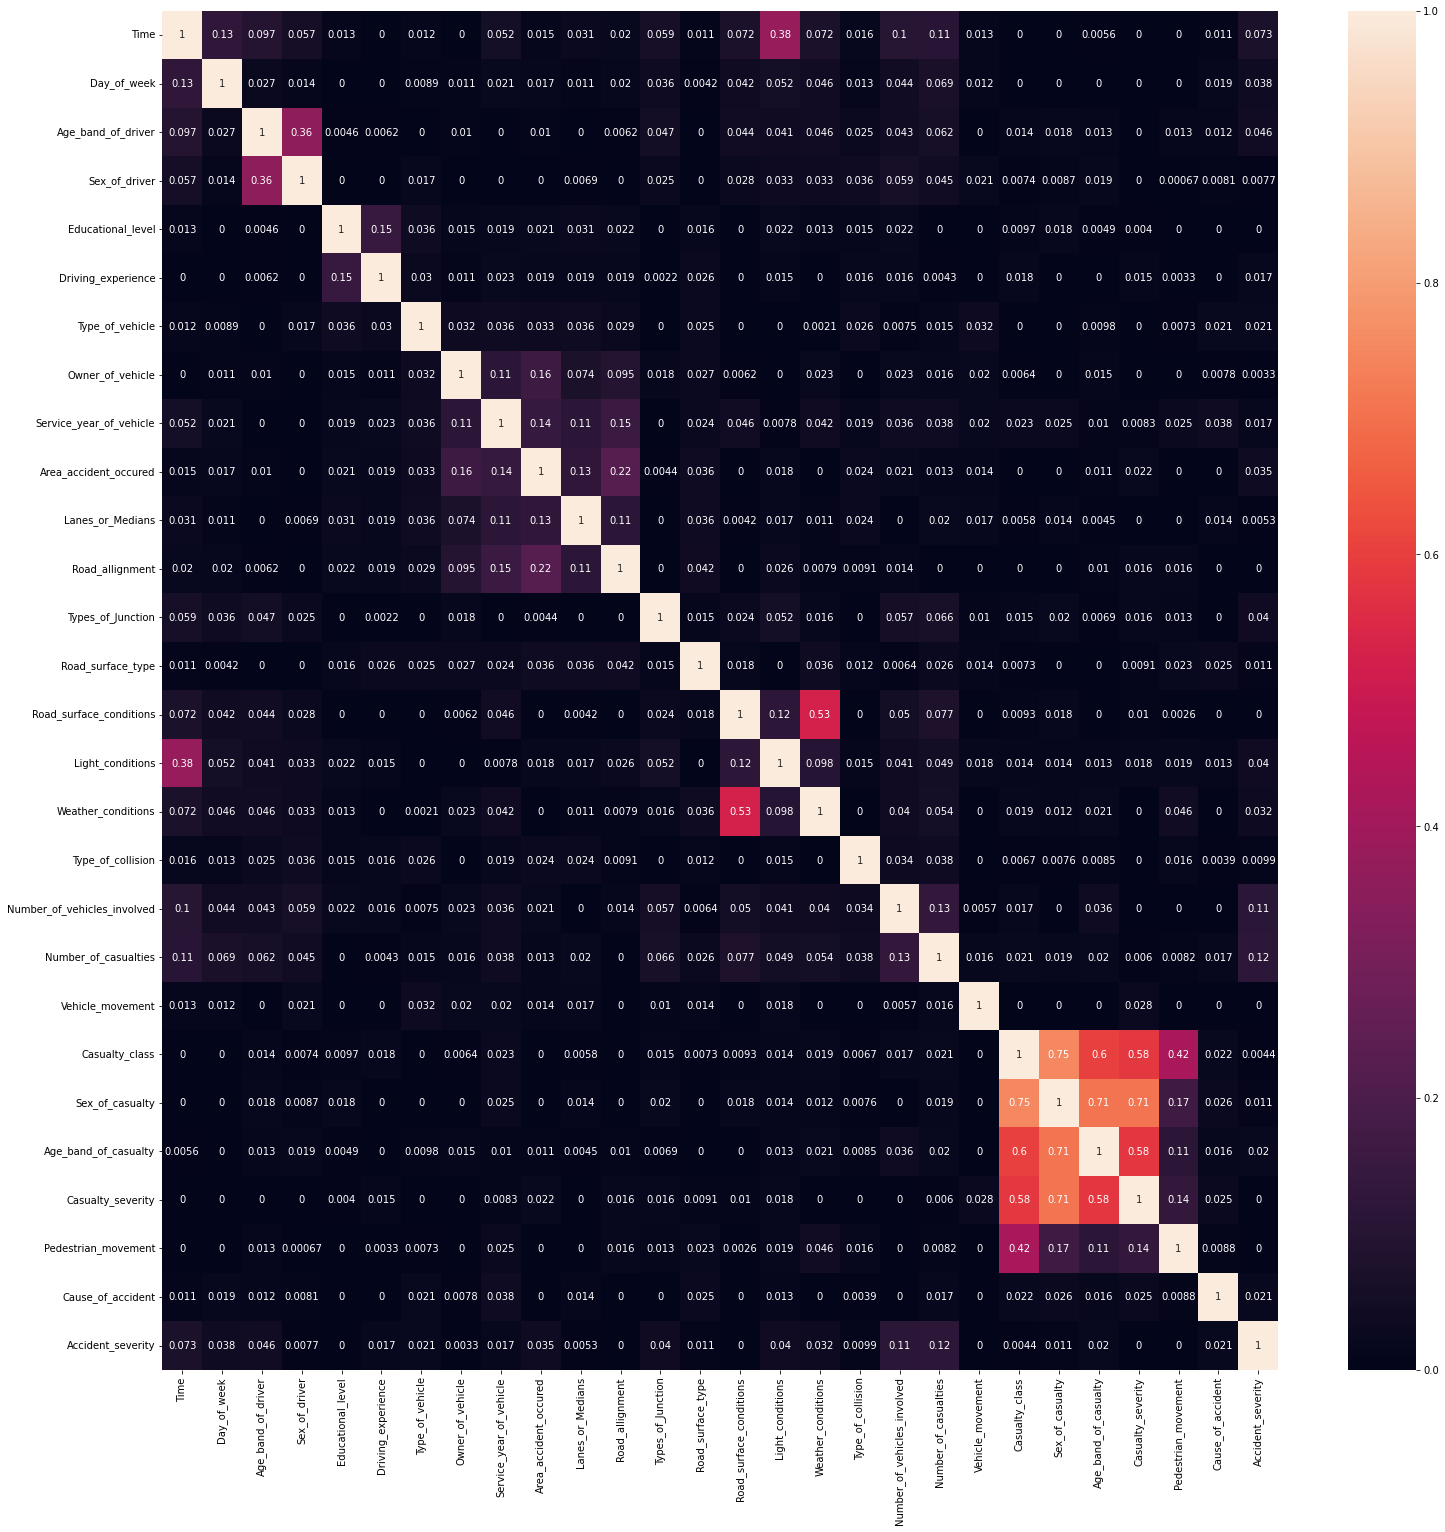

In [309]:
plt.figure(figsize=(25,25))
sns.heatmap(correlationDataFrame, annot=True)

## 1.7) Features Selection

In [310]:
features_with_low_accuracy

['Service_year_of_vehicle']

In [311]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Unknown,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Unknown,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,5-10yrs,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [315]:
dataset.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [316]:
features_to_remove = ['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Service_year_of_vehicle', 'Type_of_vehicle']

In [317]:
dataset = dataset.drop(features_to_remove, axis=1)

In [62]:
dataset.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

# 2.) Model Creation

### 2.1)  Evaluating baseline model

In [65]:
modelsDict = dict()

In [224]:
X = dataset.drop('Accident_severity', axis=1)

In [227]:
X.head()

,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [229]:
dataset.shape

(12316, 21)

In [225]:
X = pd.get_dummies(X)

In [230]:
X.head()

,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
le = LabelEncoder()

In [72]:
y = dataset['Accident_severity']

In [73]:
y = le.fit_transform(y)

In [74]:
y

array([2, 2, 1, ..., 1, 2, 2])

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [76]:
from xgboost import XGBClassifier

In [77]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [78]:
def buildModel(X_train, X_test, y_train, y_test, modelVersion):
  clf = XGBClassifier(n_jobs = -1, use_label_encoder=False)
  clf.fit(X_train,y_train)
  train_predictions = clf.predict(X_train)
  test_predictions = clf.predict(X_test)



  print('Classification Report: ', classification_report(y_test, test_predictions))
  print('Confusion Matrix: ', confusion_matrix(y_test, test_predictions))

  train_accuracy = accuracy_score(y_train, clf.predict(X_train))
  train_precision = precision_score(y_train, clf.predict(X_train), average=None)
  train_recall = recall_score(y_train, clf.predict(X_train), average=None)
  train_f1Score = f1_score(y_train, clf.predict(X_train), average = None)

  test_accuracy = accuracy_score(y_test, clf.predict(X_test))
  test_precision = precision_score(y_test, clf.predict(X_test), average=None)
  test_recall = recall_score(y_test, clf.predict(X_test), average=None)
  test_f1Score = f1_score(y_test, clf.predict(X_test), average=None)

  
  modelDict = {
    'Training Data':{
      'accuracy' : train_accuracy,
      'precision' : train_precision,
      'recall' : train_recall,
      'F1 score' : train_f1Score
    },

    'Test Data' :{
      'accuracy' : test_accuracy,
      'precision' : test_precision,
      'recall' : test_recall,
      'F1 score' : test_f1Score
    }
  }

  modelsDict[modelVersion] = modelDict

In [79]:
buildModel(X_train, X_test, y_train, y_test, 'Initial Model')

[19:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       0.80      0.15      0.25        54
           1       0.58      0.10      0.18       509
           2       0.86      0.99      0.92      3132

    accuracy                           0.85      3695
   macro avg       0.75      0.41      0.45      3695
weighted avg       0.82      0.85      0.81      3695

Confusion Matrix:  [[   8    1   45]
 [   0   53  456]
 [   2   37 3093]]


## 1.8) Handeling Data Imbalance

### 1.8.1) Random under-sampling with imblearn

In [80]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [81]:
rus = RandomUnderSampler(random_state=42)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({2: 10415, 1: 1743, 0: 158})
Resample dataset shape Counter({0: 104, 1: 104, 2: 104})


In [82]:
#X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=.3, random_state=101)

In [83]:
buildModel(X_rus, X_test, y_rus, y_test, 'Random Under Sampling')

[19:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       0.04      0.54      0.08        54
           1       0.16      0.43      0.24       509
           2       0.89      0.48      0.62      3132

    accuracy                           0.48      3695
   macro avg       0.37      0.48      0.31      3695
weighted avg       0.78      0.48      0.56      3695

Confusion Matrix:  [[  29   17    8]
 [ 108  220  181]
 [ 523 1101 1508]]


### 1.8.2) Random over-sampling with imblearn

In [84]:
from imblearn.over_sampling import RandomOverSampler

In [85]:
ros = RandomOverSampler(random_state=101)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({2: 10415, 1: 1743, 0: 158})
Resample dataset shape Counter({2: 7283, 1: 7283, 0: 7283})


In [86]:
#X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=.3, random_state=101)

In [87]:
buildModel(X_ros, X_test, y_ros, y_test, 'Random Over Sampling')

[19:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       0.58      0.26      0.36        54
           1       0.26      0.34      0.29       509
           2       0.88      0.84      0.86      3132

    accuracy                           0.77      3695
   macro avg       0.57      0.48      0.50      3695
weighted avg       0.79      0.77      0.78      3695

Confusion Matrix:  [[  14   15   25]
 [   1  173  335]
 [   9  480 2643]]


### 1.8.3) Using SMOTETomek

In [88]:
from imblearn.combine import SMOTETomek

In [89]:
Counter(y)

Counter({2: 10415, 1: 1743, 0: 158})

In [90]:
sm = SMOTETomek(random_state=101, n_jobs=-1)

In [91]:
sm.get_params()

{'n_jobs': -1,
 'random_state': 101,
 'sampling_strategy': 'auto',
 'smote': None,
 'tomek': None}

In [232]:
X_Smote, y_Smote = sm._fit_resample(X_train, y_train)

In [233]:
Counter(y_Smote)

Counter({2: 7266, 1: 7271, 0: 7276})

In [94]:
#X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_Smote, y_Smote, test_size=.3, random_state=101)

In [234]:
buildModel(X_Smote, X_test, y_Smote, y_test, 'SMOTETomek')

[21:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       0.67      0.04      0.07        54
           1       0.40      0.09      0.15       509
           2       0.86      0.98      0.91      3132

    accuracy                           0.84      3695
   macro avg       0.64      0.37      0.38      3695
weighted avg       0.79      0.84      0.80      3695

Confusion Matrix:  [[   2    4   48]
 [   0   46  463]
 [   1   66 3065]]


### 1.8.4) NearMiss

In [96]:
from imblearn.under_sampling import NearMiss

In [97]:
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({2: 10415, 1: 1743, 0: 158})
Resample dataset shape: Counter({0: 104, 1: 104, 2: 104})


In [98]:
#X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=.3, random_state=101)

In [99]:
buildModel(X_nm, X_test, y_nm, y_test, 'Near Miss')

[19:40:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       0.02      0.72      0.04        54
           1       0.14      0.40      0.20       509
           2       0.87      0.15      0.25      3132

    accuracy                           0.19      3695
   macro avg       0.34      0.42      0.17      3695
weighted avg       0.76      0.19      0.24      3695

Confusion Matrix:  [[  39   13    2]
 [ 239  203   67]
 [1417 1257  458]]


### Conclusion
##### SMOTETomek gives the best results

In [100]:
modelsDict['SMOTETomek']

{'Training Data': {'accuracy': 0.9764032073310424,
  'precision': array([0.99358187, 0.99940925, 0.93998189]),
  'recall': array([0.99917605, 0.93055556, 0.99944987]),
  'F1 score': array([0.99637111, 0.96375418, 0.96880416])},
 'Test Data': {'accuracy': 0.8376184032476319,
  'precision': array([0.4       , 0.3515625 , 0.85569905]),
  'recall': array([0.03703704, 0.08840864, 0.97318008]),
  'F1 score': array([0.06779661, 0.14128728, 0.91066627])}}

## 1.9) Hyper-parameters Tuning

In [101]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [102]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

In [103]:
xgb_clf = XGBClassifier(n_jobs = 6, random_state =101)

In [104]:
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': 6,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 101,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [251]:
# paramsDict = {
#   'n_estimators' : [100, 200, 300],
#   'max_depth' : list(range(5,14)),
#   'criterion' : ['gini'],
#   'min_samples_split': [2,3],
#   'colsample_bytree':[0.5], 
#   'colsample_bylevel':[0.5],
#   'colsample_bynode':[0.5]
#   }
paramsDict = {
 'colsample_bylevel': [0.5],
 'colsample_bytree': [0.5],
 'learning_rate': [0.05],
 'max_depth': [11],
 'min_child_weight': [5],
 'n_estimators': [200],
 'n_jobs': [6],
 'random_state': [42],
 'reg_alpha': [0],
 'reg_lambda': [1],
 'subsample': [0.8],
 }

In [252]:
grid_search = GridSearchCV(xgb_clf, param_grid=paramsDict, cv=cv, scoring='f1_weighted', n_jobs = 6)

On Test Data               precision    recall  f1-score   support

           0       1.00      0.09      0.17        54
           1       0.39      0.09      0.14       509
           2       0.86      0.98      0.91      3132

    accuracy                           0.84      3695
   macro avg       0.75      0.39      0.41      3695
weighted avg       0.79      0.84      0.80      3695

 precision    recall  f1-score   support

           0       1.00      1.00      1.00      7282
           1       1.00      0.93      0.97      7272
           2       0.94      1.00      0.97      7271

    accuracy                           0.98     21825
   macro avg       0.98      0.98      0.98     21825
weighted avg       0.98      0.98      0.98     21825


              precision    recall  f1-score   support

           0       1.00      0.09      0.17        54
           1       0.37      0.08      0.13       509
           2       0.86      0.98      0.91      3132

    accuracy                           0.84      3695
   macro avg       0.74      0.38      0.40      3695
weighted avg       0.79      0.84      0.79      3695

In [253]:
grid_search.fit(X_Smote, y_Smote)

print(classification_report(y_Smote,grid_search.predict(X_Smote)))
print()
print(classification_report(y_test,grid_search.predict(X_test)))

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7276
           1       1.00      0.91      0.95      7271
           2       0.92      1.00      0.96      7266

    accuracy                           0.97     21813
   macro avg       0.97      0.97      0.97     21813
weighted avg       0.97      0.97      0.97     21813


              precision    recall  f1-score   support

           0       0.40      0.04      0.07        54
           1       0.34      0.06      0.10       509
           2       0.85      0.98      0.91      3132

    accuracy                           0.84      3695
   macro avg       0.53      0.36  

In [1502]:
grid_search.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bynode': 0.5,
 'colsample_bytree': 0.5,
 'criterion': 'gini',
 'max_depth': 13,
 'min_samples_split': 2,
 'n_estimators': 100}

In [1503]:
#pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bynode,param_colsample_bytree,param_criterion,param_max_depth,param_min_samples_split,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,16.269434,0.905833,0.035044,0.007699,0.5,0.5,0.5,gini,5,2,...,0.922635,0.923525,0.922766,0.919428,0.920309,0.924482,0.922613,0.921350,0.003181,53
1,28.201348,0.414040,0.038584,0.008052,0.5,0.5,0.5,gini,5,2,...,0.931846,0.934382,0.934302,0.930140,0.931713,0.934756,0.932731,0.932268,0.002729,49
2,45.291789,1.812319,0.051089,0.011979,0.5,0.5,0.5,gini,5,2,...,0.934784,0.938565,0.937295,0.932159,0.935090,0.935695,0.934503,0.935315,0.002772,43
3,16.810637,0.600073,0.031847,0.006012,0.5,0.5,0.5,gini,5,3,...,0.922635,0.923525,0.922766,0.919428,0.920309,0.924482,0.922613,0.921350,0.003181,53
4,33.727431,0.562635,0.043993,0.006560,0.5,0.5,0.5,gini,5,3,...,0.931846,0.934382,0.934302,0.930140,0.931713,0.934756,0.932731,0.932268,0.002729,49
5,43.055245,4.478713,0.046528,0.010042,0.5,0.5,0.5,gini,5,3,...,0.934784,0.938565,0.937295,0.932159,0.935090,0.935695,0.934503,0.935315,0.002772,43
6,15.360767,0.389583,0.039812,0.034803,0.5,0.5,0.5,gini,6,2,...,0.929189,0.930286,0.927445,0.927332,0.930331,0.931548,0.929435,0.929397,0.002171,51
7,37.324983,1.247045,0.046177,0.005687,0.5,0.5,0.5,gini,6,2,...,0.933410,0.939316,0.935334,0.934437,0.932765,0.936425,0.936142,0.935136,0.002320,45
8,71.815088,11.065245,0.094489,0.028941,0.5,0.5,0.5,gini,6,2,...,0.933580,0.938447,0.938789,0.936731,0.936579,0.938784,0.938279,0.936640,0.002378,41
9,29.977360,0.553116,0.060563,0.010390,0.5,0.5,0.5,gini,6,3,...,0.929189,0.930286,0.927445,0.927332,0.930331,0.931548,0.929435,0.929397,0.002171,51


In [1518]:
best_params = {'criterion': ['gini'], 'max_depth':[11], 'n_estimators': [200]}

In [1519]:
grid_search_best = GridSearchCV(xgb_clf, param_grid=best_params, cv=cv, n_jobs=-1)

In [1521]:
predictions_xgb_smoteTomek_train = grid_search.predict(X_Smote)

In [1522]:
predictions_xgb_smoteTomek_test = grid_search.predict(X_test)

In [1523]:
print('On Train Data', classification_report(y_Smote, predictions_xgb_smoteTomek_train))

On Train Data               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7282
           1       1.00      1.00      1.00      7271
           2       1.00      1.00      1.00      7270

    accuracy                           1.00     21823
   macro avg       1.00      1.00      1.00     21823
weighted avg       1.00      1.00      1.00     21823



In [1524]:
print('On Test Data', classification_report(y_test, predictions_xgb_smoteTomek_test))

On Test Data               precision    recall  f1-score   support

           0       1.00      0.09      0.17        54
           1       0.39      0.09      0.14       509
           2       0.86      0.98      0.91      3132

    accuracy                           0.84      3695
   macro avg       0.75      0.39      0.41      3695
weighted avg       0.79      0.84      0.80      3695



In [1279]:
print(confusion_matrix(y_test, predictions_xgb_smoteTomek_test))

[[   4    1   49]
 [   0   41  468]
 [   0   56 3076]]


# 3.) Making predictions by prepared model

In [1064]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Daylight,Normal,Collision with roadside objects,2,2,Going straight,31-50,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,18-30,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,Slight Injury


In [1065]:
def makePredictions(X):
  predictions = grid_search_best.predict(X)
  return predictions

In [1066]:
randomNumber = np.random.randint(0, X_test.shape[0]+1)
testData = X_test.iloc[randomNumber]
actual_value = y_test[randomNumber]
predicted_value = makePredictions([testData])[0]

accident_severity = {0: 'Fatal injury', 1 : 'Serious injury' , 2:'Slight injury'}

print('Actual Value: ', accident_severity[actual_value])
print('Predicted Value: ', accident_severity[predicted_value])

Actual Value:  Slight injury
Predicted Value:  Slight injury


# 4.) Saving the model

In [1067]:
import joblib

In [1068]:
joblib.dump(grid_search_best,'../Model/finalModel_xgb')

['../Model/finalModel_xgb']

# PCA and KNN

In [137]:
X_train.head()

,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
10024,12,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10941,17,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3281,10,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5114,17,2,2,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1722,23,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
X.head()

,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
sc = StandardScaler()

In [141]:
X = sc.fit_transform(X)

In [142]:
X

array([[ 0.60817839, -0.05906077,  0.44864885, ..., -0.11066273,
        -0.07983477, -0.04509998],
       [ 0.60817839, -0.05906077,  0.44864885, ..., -0.11066273,
        -0.07983477, -0.04509998],
       [ 0.60817839, -0.05906077,  0.44864885, ..., -0.11066273,
        -0.07983477, -0.04509998],
       ...,
       [-0.16065148, -1.51094177, -0.54426386, ..., -0.11066273,
        -0.07983477, -0.04509998],
       [-0.16065148, -0.05906077, -0.54426386, ..., -0.11066273,
        -0.07983477, -0.04509998],
       [-0.16065148, -0.05906077, -0.54426386, ..., -0.11066273,
        -0.07983477, -0.04509998]])

In [143]:
from sklearn.decomposition import PCA

In [148]:
pca = PCA(n_components = 2)

In [149]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [150]:
X = pca.fit_transform(X)

In [151]:
X

array([[-1.23523051, -0.5068728 ],
       [-1.24625368, -0.48106527],
       [-0.80836969, -0.55419662],
       ...,
       [-1.44487858, -0.29389207],
       [-0.26264867,  4.98824328],
       [-0.34783391,  0.24049045]])

In [152]:
X_df = pd.DataFrame(X, columns=['X1', 'X2'])

In [153]:
X_df.head()

,X1,X2
0,-1.235231,-0.506873
1,-1.246254,-0.481065
2,-0.808370,-0.554197
3,-0.242811,-0.235923
4,-0.315290,-0.236883


In [156]:
X_df.shape

(12316, 2)

In [157]:
dataset['Accident_severity'].shape

(12316,)

In [159]:
X_df = pd.concat([X_df, dataset['Accident_severity']], axis=1)

<AxesSubplot:xlabel='X1', ylabel='X2'>

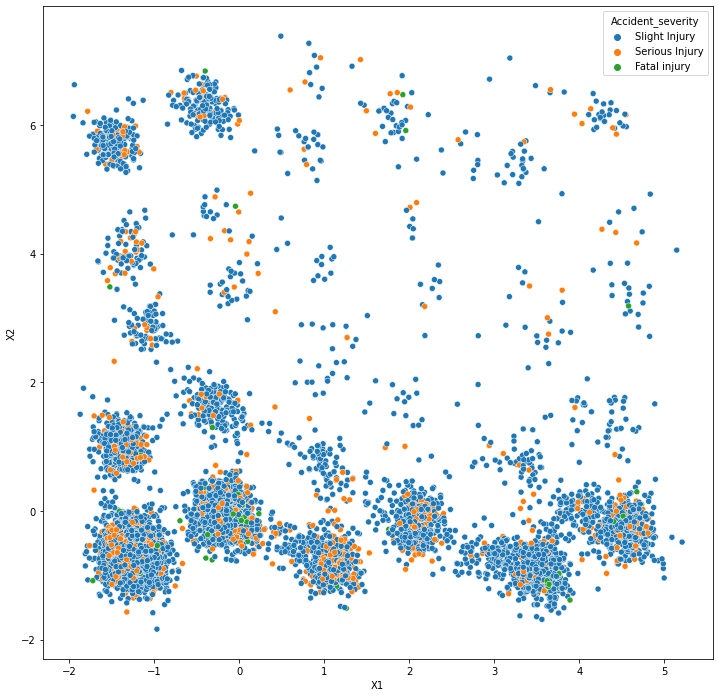

In [160]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = 'X1', y='X2', data = X_df, hue = 'Accident_severity')

In [204]:
X_pca = X_df.drop('Accident_severity', axis=1)
y_pca = X_df['Accident_severity']

In [209]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size = .3, random_state=42)

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [210]:
knn = KNeighborsClassifier(n_neighbors=15)

In [211]:
knn.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=15)

In [212]:
print(classification_report(y_train_pca, knn.predict(X_train_pca)))
print()
print(classification_report(y_test_pca, knn.predict(X_test_pca)))

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00       106
Serious Injury       1.00      0.00      0.01      1191
 Slight Injury       0.85      1.00      0.92      7324

      accuracy                           0.85      8621
     macro avg       0.62      0.33      0.31      8621
  weighted avg       0.86      0.85      0.78      8621


                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        52
Serious Injury       0.33      0.00      0.00       552
 Slight Injury       0.84      1.00      0.91      3091

      accuracy                           0.84      3695
     macro avg       0.39      0.33      0.30      3695
  weighted avg       0.75      0.84      0.76      3695



C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [186]:
errors = list()

In [181]:
for k in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)
  error = np.mean(predictions != y_test)
  errors.append(error)

<AxesSubplot:>

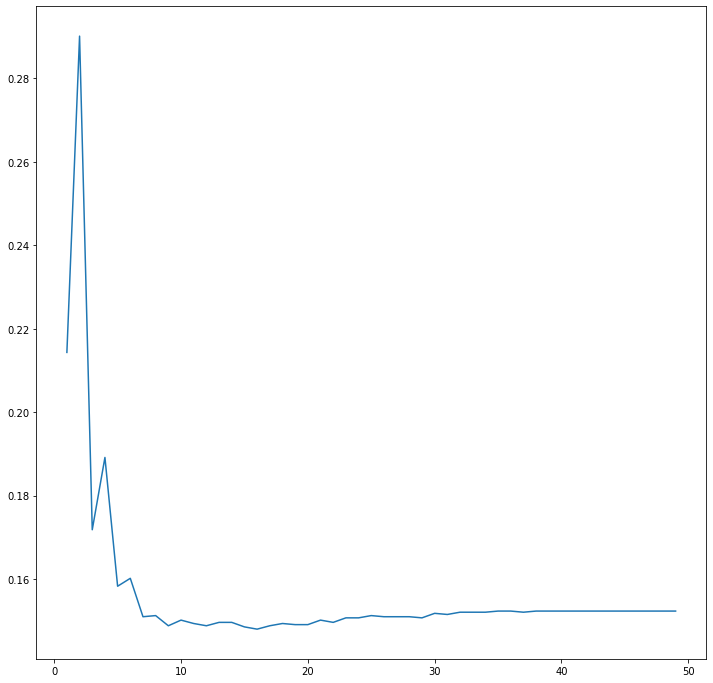

In [182]:
plt.figure(figsize=(12,12))
sns.lineplot(x = list(range(1,50)), y = errors)